In [24]:
import oracles
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from inspect import getfullargspec
from itertools import product
from optimization import *
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt
from utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
np.random.seed(45)
random.seed(46)

def get_random_array_x(shape, cnt=10):
    array_x = []
    for _ in range(cnt):
        array_x.append(np.random.rand(shape) * 10 - 5)

    return array_x

def avg_time_to_convergence(n, k, array_x=None, cnt=10, method = 'Wolfe'):
    if array_x is None:
        array_x = get_random_array_x(n, cnt)
    oracle = oracles.QuadraticOracle(
      diags(np.random.randint(1, k + 1, n)), np.random.rand(n) * 10 - 5)

    result = 0
    lst = LineSearchTool(method)
    for x in array_x:
        _, _, history = gradient_descent(oracle, x, trace=True, line_search_options=lst)
        result += len(history['time']) / cnt

    return result

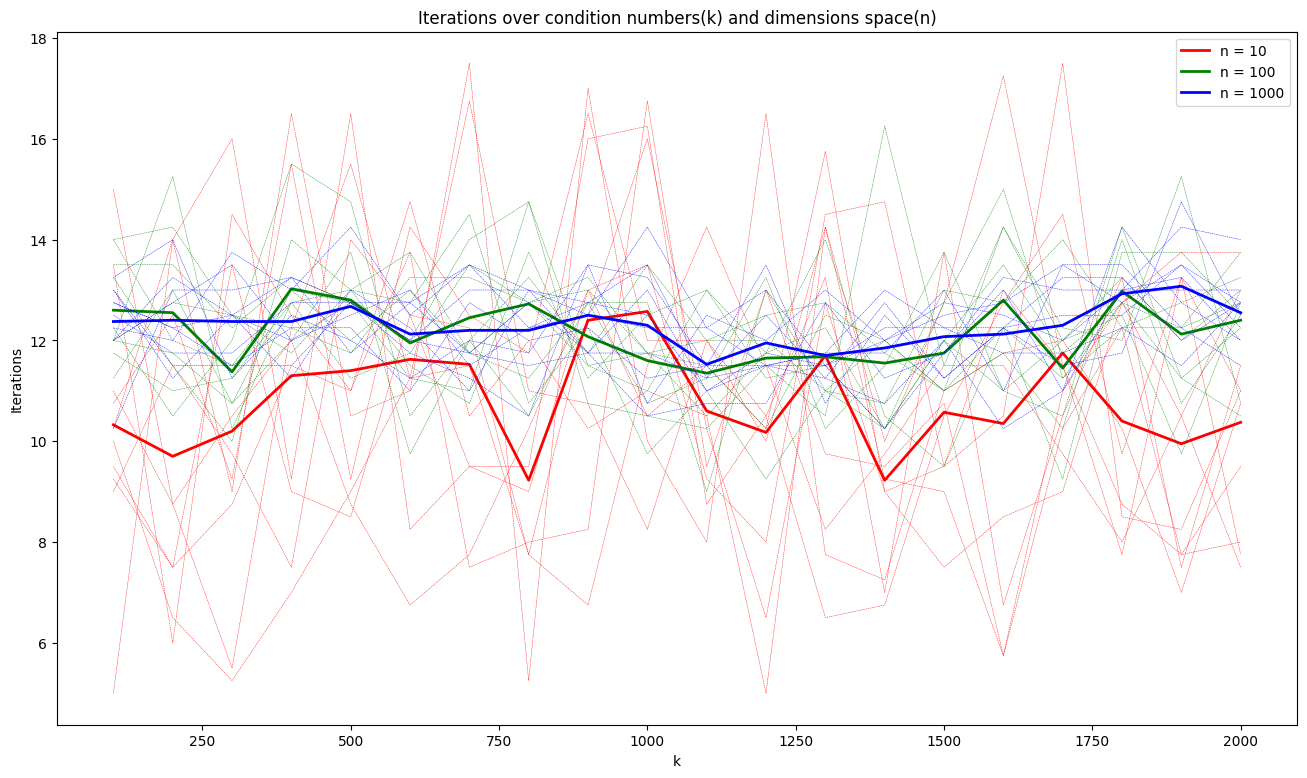

In [26]:
launches = range(10)
array_n = np.logspace(1, 3, 3, dtype=int)
array_k = (np.arange(20)+1)*100
df = pd.DataFrame(columns=['i', 'n', 'k', 'convergence_time'])
for i, (launch, n, k) in enumerate(product(launches, array_n, array_k)):
    df.loc[i] = [launch, n, k, avg_time_to_convergence(n, k, cnt = 4,)]

df['avg_time'] = 0
colors = ['r', 'g', 'b']
plt.figure(figsize=(16, 9))
for n, color in zip(array_n, colors):
    for i in launches:
        df_ni = df[(df['i'] == i) & (df['n'] == n)]
        plt.plot(df_ni['k'], df_ni['convergence_time'], color=color, linestyle='--', linewidth=.3)
        df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)

    df_n0 = df[(df['i'] == 0) & (df['n'] == n)]
    
    plt.plot(df_n0['k'], df_n0['avg_time'], color=color, linewidth=2, label='n = ' + str(n))

plt.xlabel('k')
plt.ylabel('Iterations')
plt.title('Iterations over condition numbers(k) and dimensions space(n)')
plt.legend()
plt.show()

In [29]:
np.random.seed(45)
random.seed(46)

def get_random_array_x(shape, cnt=10):
    array_x = []
    for _ in range(cnt):
        array_x.append(np.random.rand(shape) * 10 - 5)

    return array_x

def avg_time_to_convergence(n, k, array_x=None, cnt=10, method = 'Wolfe'):
    if array_x is None:
        array_x = get_random_array_x(n, cnt)
    oracle = oracles.QuadraticOracle(
      diags(np.random.randint(1, k + 1, n)), np.random.rand(n) * 10 - 5)

    result = 0
    for x in array_x:
        _, _, history = conjugate_gradients(lambda x: oracle.A@x, oracle.b, x, trace=True)
        result += len(history['time']) / cnt

    return result

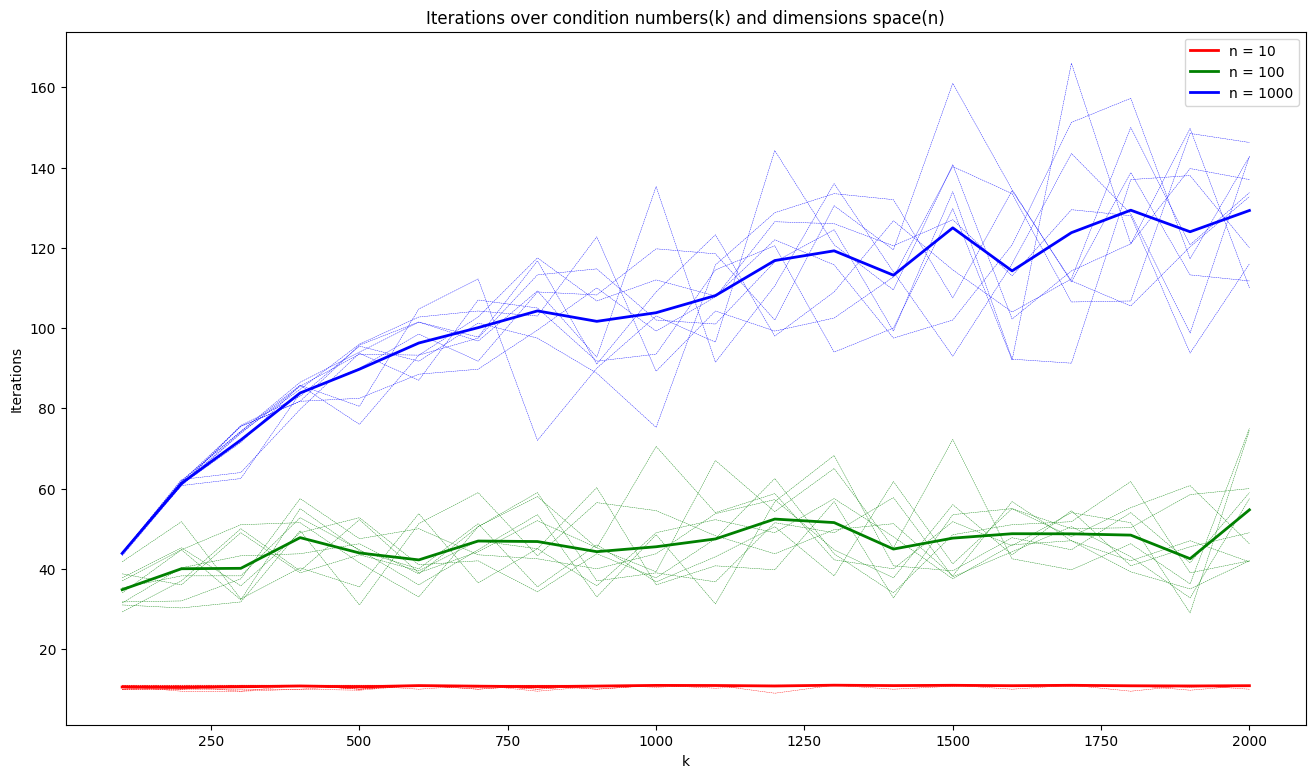

In [30]:
launches = range(10)
array_n = np.logspace(1, 3, 3, dtype=int)
array_k = (np.arange(20)+1)*100
df = pd.DataFrame(columns=['i', 'n', 'k', 'convergence_time'])
for i, (launch, n, k) in enumerate(product(launches, array_n, array_k)):
    df.loc[i] = [launch, n, k, avg_time_to_convergence(n, k, cnt = 4,)]

df['avg_time'] = 0
colors = ['r', 'g', 'b']
plt.figure(figsize=(16, 9))
for n, color in zip(array_n, colors):
    for i in launches:
        df_ni = df[(df['i'] == i) & (df['n'] == n)]
        plt.plot(df_ni['k'], df_ni['convergence_time'], color=color, linestyle='--', linewidth=.3)
        df.loc[(df['i'] == 0) & (df['n'] == n), 'avg_time'] += (df_ni['convergence_time'].to_numpy()) / len(launches)

    df_n0 = df[(df['i'] == 0) & (df['n'] == n)]
    
    plt.plot(df_n0['k'], df_n0['avg_time'], color=color, linewidth=2, label='n = ' + str(n))

plt.xlabel('k')
plt.ylabel('Iterations')
plt.title('Iterations over condition numbers(k) and dimensions space(n)')
plt.legend()
plt.show()